CONTEXT

AllLife Bank is a US bank with mainly depositor clients, which wants to expand her borrower clients.

OBJECTIVES

1. Analyse the data set
2. Preprocess the data
3. Fit a logistical regression and a decision tree that predict whether a client would accept a personal loan
4. Draw insights and offer recommendations

QUESTIONS

1. What are the key factors influencing whether a client will buy a personal loan?
2. Could a predictive model be designed?
3. What would the performance of such a model be?
4. Which segment of customers should be targeted more?

DATA INFORMATION

Data Dictionary

1. ID: Customer ID
2. Age: Customer’s age in completed years
3. Experience: #years of professional experience
4. Income: Annual income of the customer (in thousand dollars)
5. ZIP Code: Home Address ZIP code.
6. Family: the Family size of the customer
7. CCAvg: Average spending on credit cards per month (in thousand dollars)
8. Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
9. Mortgage: Value of house mortgage if any. (in thousand dollars)
10. Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
11. Securities_Account: Does the customer have securities account with the bank?
12. CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Do customers use internet banking facilities?
14. CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [104]:
# import the necessary libraries

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To preprocess
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# To build model for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    cohen_kappa_score
)

# To process zip codes
from uszipcode import SearchEngine, SimpleZipcode, ComprehensiveZipcode

In [44]:
# load the dataset and creat dataframe

df = pd.read_csv('Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


STEP 1 - PROCESSING COLUMNS

In [45]:
# drop ID col as it is not useful

df.drop('ID', axis = 1, inplace = True)

In [46]:
# investigate dimensions

df.shape

(5000, 13)

In [47]:
# investigate data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


The features appear to be the correct type. No corrections are necessary.

In [48]:
# check for duplicates

df.duplicated().sum()

0

There are no duplicates.

In [49]:
# check additional info about data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


EXPERIENCE refers to years of professional experience and should not be below 0. We notice that the min is -3. This needs further investigation.

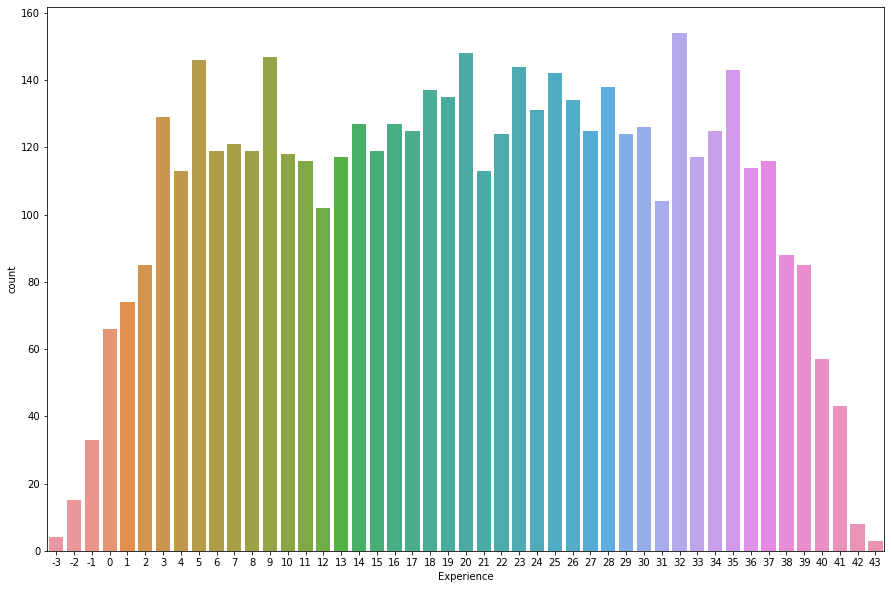

In [50]:
# visualise Experience
plt.figure(figsize = (15, 10))
sns.countplot(df['Experience']);

In [51]:
# view clients with less than 0 years of experience

df.loc[df['Experience'].isin([-3, -2, -1])]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


At first glance, what they all have in common is that they are on the younger side. Nothing else stands out.

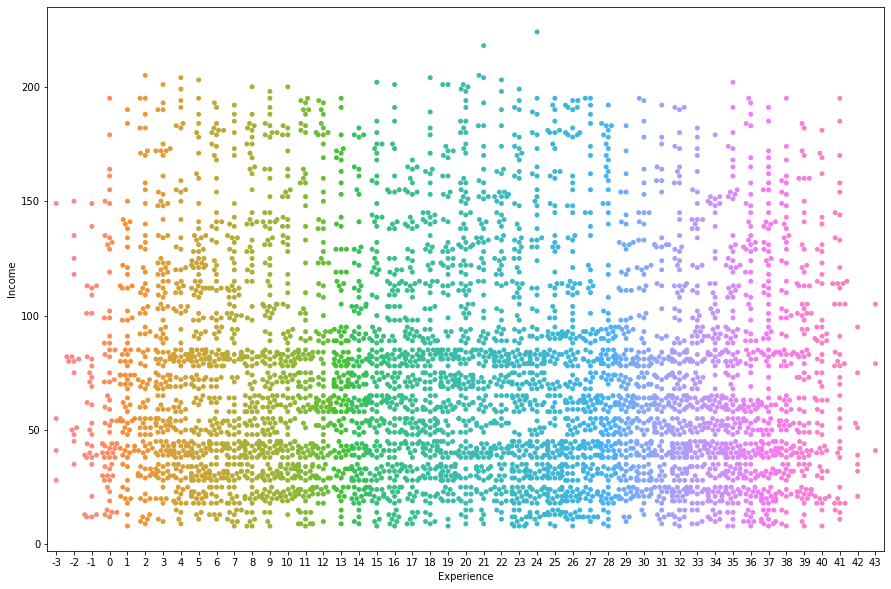

In [52]:
# visualise relationship between years of experience and income

plt.figure(figsize = (15, 10))
sns.swarmplot(data = df, x = 'Experience', y = 'Income');

It appears that the clients with less than 0 years of experience do not have an out of the ordinary income. Therefore, I will assume that it was a mistake and replace all values below 0 with 0.

In [53]:
# replace values below 0 with 0

df['Experience'].replace([-3, -2, -1], 0, inplace = True)

In [54]:
# there are several categorical features with a few select values, check that there are no odd values

categorial = ['Education', 'Securities_Account', 'CD_Account', 'Online', 'Family', 'Personal_Loan']

for x in categorial:
    print(df[x].value_counts().sort_values(ascending = False))
    print("*" * 50)

1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************************
0    4478
1     522
Name: Securities_Account, dtype: int64
**************************************************
0    4698
1     302
Name: CD_Account, dtype: int64
**************************************************
1    2984
0    2016
Name: Online, dtype: int64
**************************************************
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
**************************************************
0    4520
1     480
Name: Personal_Loan, dtype: int64
**************************************************


There are no odd values.

STEP 2 - MISSING VALUES

In [55]:
# check for missing values

df.isnull().sum().sort_values(ascending = False)

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

It appears that there are no missing values.

STEP 3 - OUTLIERS

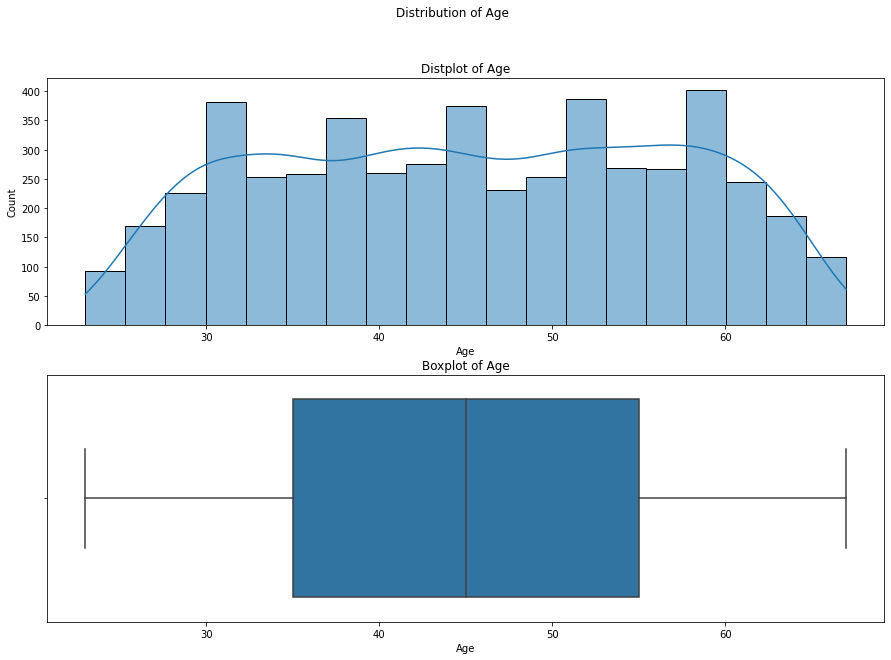

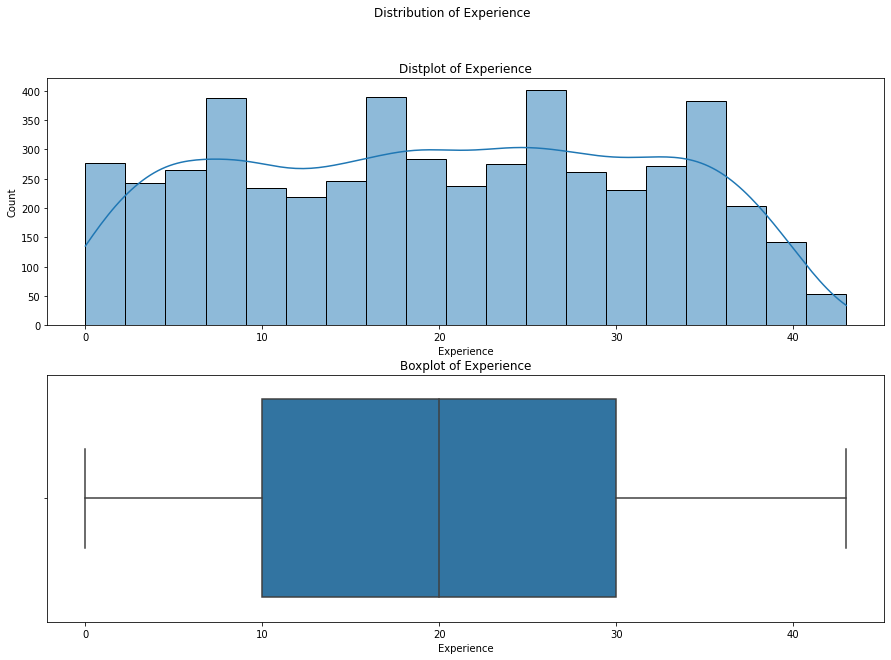

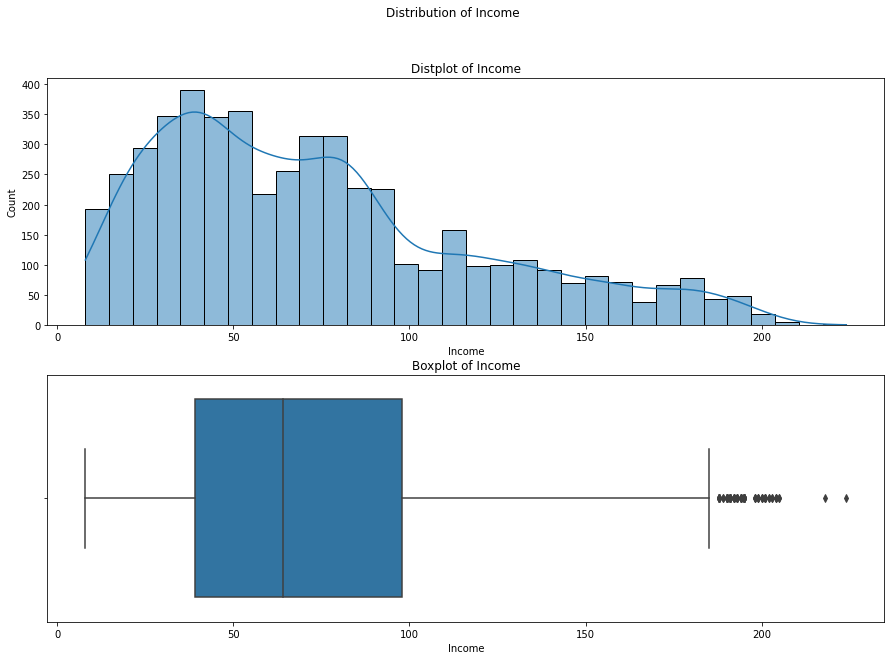

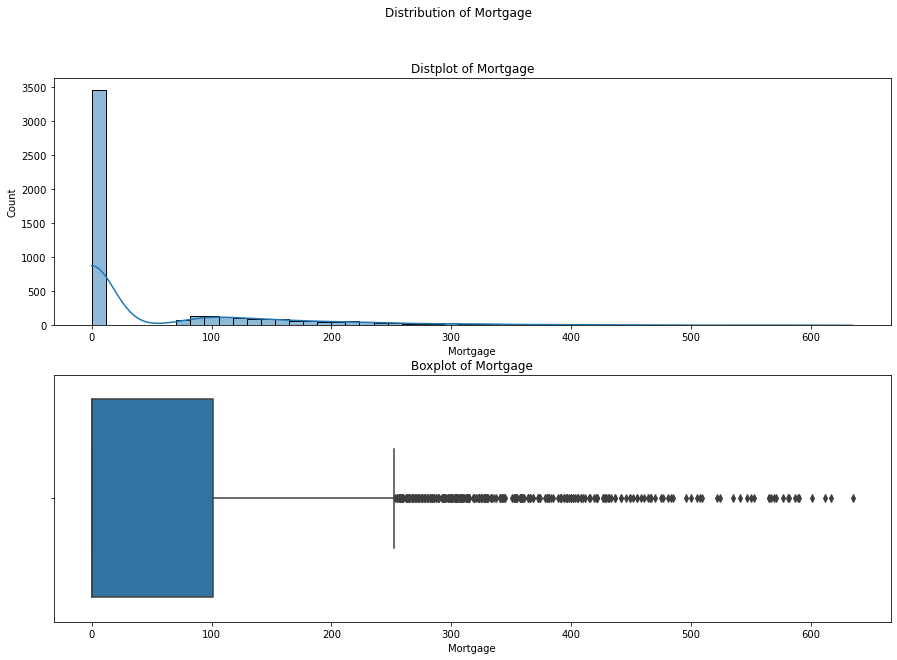

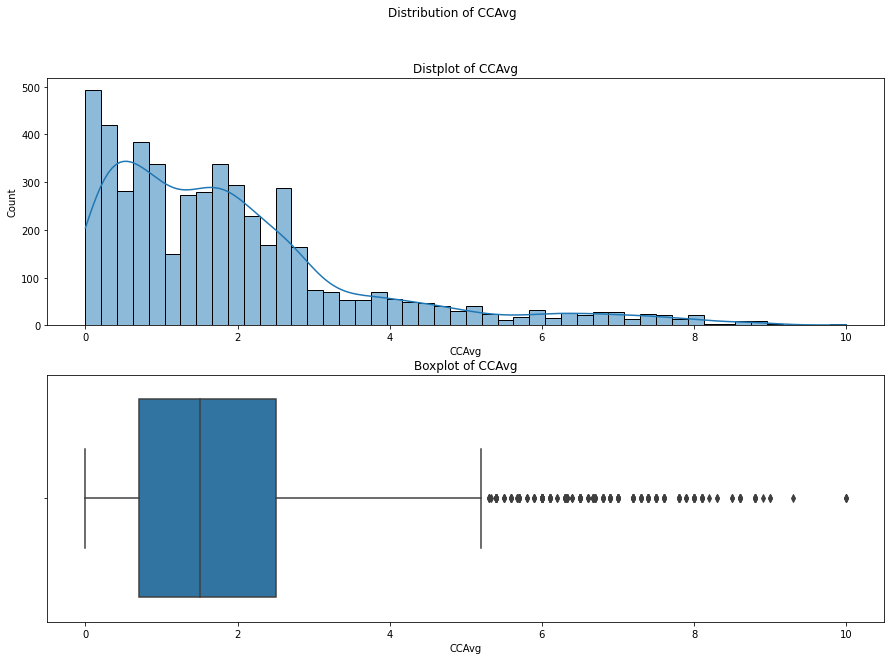

In [56]:
# plot the distribution of the continous variables as histogram and as a boxplot

cols = ['Age', 'Experience', 'Income', 'Mortgage', 'CCAvg']

for col in cols:
    fig = plt.figure(figsize = (15,10))
    fig.suptitle(f'Distribution of {col}')

    plt.subplot(211)
    plt.title(f'Distplot of {col}')
    sns.histplot(df[col], kde = True);

    plt.subplot(212)
    plt.title(f'Boxplot of {col}')
    sns.boxplot(data = df, x = col);



These graphs show that:
- Age and Experience do not have obvious outliers
- Income and CCAvg might have outliers that must be dealt with
- Mortgage, due to the huge amount of clients with no mortgage, would better be expressed as categorical

In [57]:
# I will use the inter-quartile range method to eliminate outliers beyond 4*IQR
# as both Income and CCAvg appear to be right skewed, I will use the median

cols = ['Income', 'CCAvg']

for col in cols:
    quartiles = np.quantile(df[col][df[col].notnull()], [.25, .75])
    iqr4 = 4 * (quartiles[1] - quartiles[0])
    print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {iqr4}')
    outliers = df.loc[np.abs(df[col] - df[col].median()) > iqr4, col] 
    count = outliers.count()
    print(f'Entries outside 4*IQR for {col}: {count}')

Q1 = 39.0, Q3 = 98.0, 4*IQR = 236.0
Entries outside 4*IQR for Income: 0
Q1 = 0.7, Q3 = 2.5, 4*IQR = 7.2
Entries outside 4*IQR for CCAvg: 16


In [58]:
# only CCAvg has outliers outside the specified range, they will be dropped

quartiles = np.quantile(df['CCAvg'][df['CCAvg'].notnull()], [.25, .75])
iqr4 = 4 * (quartiles[1] - quartiles[0])
outliers = df.loc[np.abs(df['CCAvg'] - df['CCAvg'].median()) > iqr4].index
df.drop(outliers, axis = 0, inplace = True)
df.reset_index(inplace=True, drop=True)

In [59]:
# for Mortgage, I will replace all non-zero values with 1

df.loc[df.Mortgage != 0, 'Mortgage'] = 1
df['Mortgage'].value_counts()

0    3450
1    1534
Name: Mortgage, dtype: int64

STEP 4 - FEATURE ENGINEERING 

a. DIFFERENCE BETWEEN INCOME AND MEDIAN AREA INCOME - using the zipcodes, I will find the median income in an area and divide it by the client's income. The idea is that the smaller the income is compared to the median area income, the more likely a client is to need a personal loan, and vice versa for client who earn more than the median.


In [60]:
# load the comprehensive database of the uszipcode library

search = SearchEngine(simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive)

In [61]:
# use the uszipcode library to find the median household income

mhi = []

for x in range(len(df['ZIPCode'])):
    try:
        zipcode = search.by_zipcode(df['ZIPCode'].iloc[x])
        mhi.append(zipcode.median_household_income)
    except:
        mhi.append(np.nan)
df['Median_income']= mhi

In [62]:
# check for missing values

df.isnull().sum()

Age                      0
Experience               0
Income                   0
ZIPCode                  0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Personal_Loan            0
Securities_Account       0
CD_Account               0
Online                   0
CreditCard               0
Median_income         1014
dtype: int64

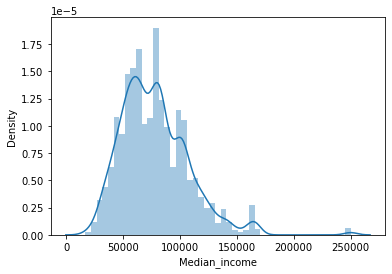

In [63]:
# to decide how I deal with missing values, I need to see the distribution

sns.distplot(df['Median_income']);

In [64]:
# the distribution is slightly skewed so I will replace the missing values wih the median

df['Median_income'].fillna(np.median(df[df['Median_income'].notna()]['Median_income']), inplace=True)

In [65]:
# next I convert the value to thousands and round them

df['Median_income'] = round(df['Median_income']/1000)

In [66]:
# finally I divide the median household value and the income, and delete the median household income column

df['Area_income_diff'] = df['Income']/df['Median_income']
df.drop('Median_income', axis = 1, inplace = True)

b. URBAN VS RURAL - using the zipcodes I will find whether a client lives in an urban or rural environment, which might affect their likelihood of needing personal loans.

In [67]:
# using uszipcode I will extract the pop density and check for missing values

pop = []

for x in range(len(df['ZIPCode'])):
    try:
        zipcode = search.by_zipcode(df['ZIPCode'].iloc[x])
        pop.append(zipcode.population_density)
    except:
        pop.append(np.nan)
df['Population']= pop

df.isnull().sum()

Age                      0
Experience               0
Income                   0
ZIPCode                  0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Personal_Loan            0
Securities_Account       0
CD_Account               0
Online                   0
CreditCard               0
Area_income_diff         0
Population            1014
dtype: int64

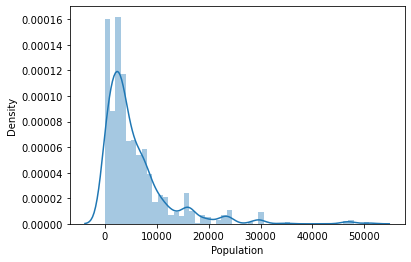

In [68]:
# to decide how I deal with missing values, I need to see the distribution

sns.distplot(df['Population']);

In [69]:
# the distribution is skewed so I will replace the missing values wih the median

df['Population'].fillna(np.median(df[df['Population'].notna()]['Population']), inplace=True)

c. DISPOSABLE INCOME  - again from uszipcode I can extract the estimated rent and utilies for the zipcodes. I will divide income by bills ending with a disposable income margin, which should influence whether a client needs a personal loan.

In [70]:
# observe how the library uszipcode encodes bills

zipcode = search.by_zipcode(df['ZIPCode'].iloc[6])
example = zipcode.monthly_rent_including_utilities_3plus_b
example

[{'key': 'Data',
  'values': [{'x': '< $200', 'y': 0},
   {'x': '$200-$299', 'y': 0},
   {'x': '$300-$499', 'y': 8},
   {'x': '$500-$749', 'y': 13},
   {'x': '$750-$999', 'y': 29},
   {'x': '$1,000+', 'y': 71}]}]

In [71]:
# Due to the way it is encoded and because I cannot know exactly which category a client actually falls into, I will use a 
# weighted average of all possible categories.

# Also, there are three categories of houses based on number of room, however, since all cover the same price range (from <200 to >1000),
# hard coding the categories is safe to do

def weighted_avg(zip):
    dic = zip[0]

    
    y1 = dic['values'][0]['y']
    y2 = dic['values'][1]['y']
    y3 = dic['values'][2]['y']
    y4 = dic['values'][3]['y']
    y5 = dic['values'][4]['y']
    y6 = dic['values'][5]['y']

    ysum = y1 + y2 + y3 + y4 + y5 + y6

    w1 = y1/ysum
    w2 = y2/ysum
    w3 = y3/ysum
    w4 = y4/ysum
    w5 = y5/ysum
    w6 = y6/ysum

    cat1 = 199
    cat2 = (200 + 299)/2
    cat3 = (300 + 499)/2
    cat4 = (500 + 749)/2
    cat5 = (750 + 999)/2
    cat6 = 1000

    final_avg = cat1*w1 + cat2*w2 + cat3*w3 + cat4*w4 + cat5*w5 + cat6*w6

    return final_avg


In [72]:
# now I will extract the bills
# uszipcode have several attributes for bills: for 1 bedroom houses, 2 bedrooms and 3 or more
# based on family size, I will estimate which category should be most appropriate

bills = []
for zip in range(len(df['ZIPCode'])):
    try:

        if df['Family'].iloc[zip] in [1,2]:
            zipcode = search.by_zipcode(df['ZIPCode'].iloc[zip])
            bills1 = zipcode.monthly_rent_including_utilities_1_b
            bills.append(weighted_avg(bills1))
        elif df['Family'].iloc[zip] == 3:
            zipcode = search.by_zipcode(df['ZIPCode'].iloc[zip])
            bills2 = zipcode.monthly_rent_including_utilities_2_b
            bills.append(weighted_avg(bills2))
        elif df['Family'].iloc[zip] == 4:
            zipcode = search.by_zipcode(df['ZIPCode'].iloc[zip])
            bills3 = zipcode.monthly_rent_including_utilities_3plus_b
            bills.append(weighted_avg(bills3))
    except: bills.append(np.nan)
    
df['Bills'] = bills

# I divide the rend by 1000 so as to make it comparable to income, expressed in thousands 
df['Bills'] = df['Bills']/1000

# finally, I check for missing values
df.isnull().sum()

Age                     0
Experience              0
Income                  0
ZIPCode                 0
Family                  0
CCAvg                   0
Education               0
Mortgage                0
Personal_Loan           0
Securities_Account      0
CD_Account              0
Online                  0
CreditCard              0
Area_income_diff        0
Population              0
Bills                 905
dtype: int64

<AxesSubplot:xlabel='Bills', ylabel='Density'>

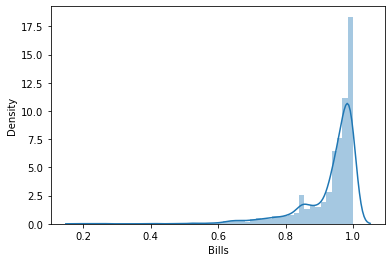

In [73]:
# to deal with the missing values I need to see the type of distribution

sns.distplot(df['Bills'])

In [74]:
# it is left skewed, so I will replace the missing values with the median

df['Bills'].fillna(np.median(df[df['Bills'].notna()]['Bills']), inplace=True)

In [75]:
# finally, I will create a new column with the disposable income

df['Disposable_inc'] = (df['Income']/12)/df['Bills']

# drop the rent column

df.drop('Bills', axis = 1, inplace = True)

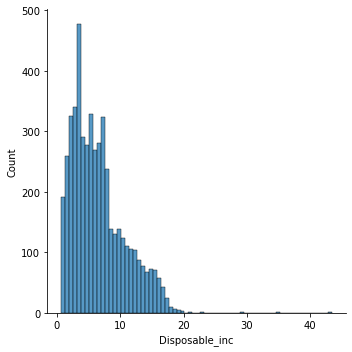

In [76]:
# view the distribution of disposable income 

sns.displot(df['Disposable_inc'])

In [77]:
# I will now also drop ZIPCode

df.drop('ZIPCode', axis = 1, inplace = True)

STEP 5 - EDA

UNIVARIATE ANALYSIS

In [140]:
# I will create a function to display the histogram and boxplot of continous variables 

def box_hist(data, col):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, sharex = True, figsize = [12,7]);
    sns.boxplot(data = data, x = col, ax = ax_box2, showmeans = True, color = 'green');
    sns.histplot(data = data, x = col, kde = True, ax = ax_hist2);
    ax_hist2.axvline(df[col].mean(), color = 'red', linestyle = "--");
    ax_hist2.axvline(df[col].median(), color = 'yellow', linestyle = "-");

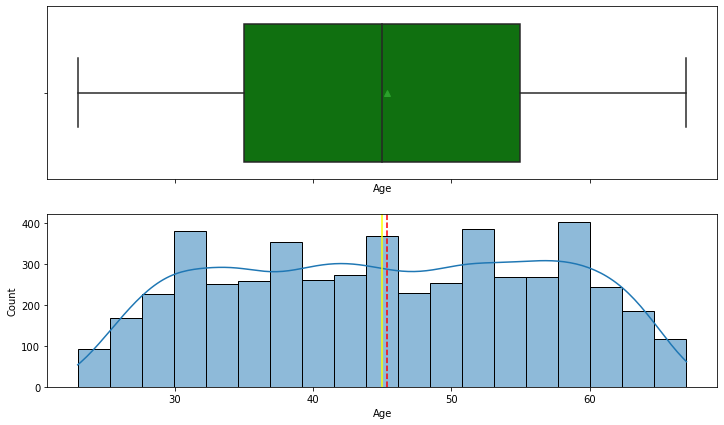

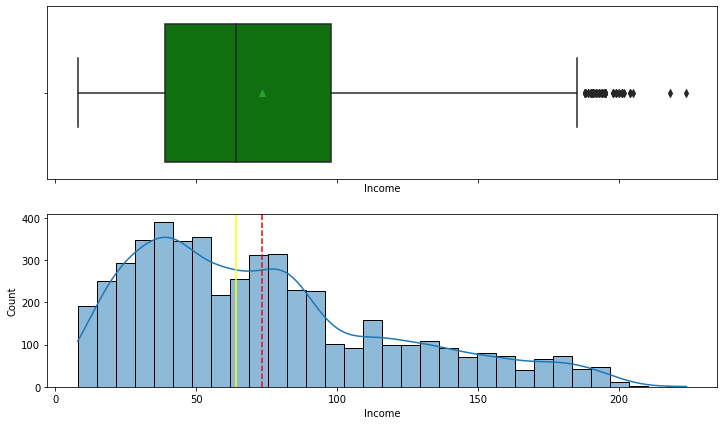

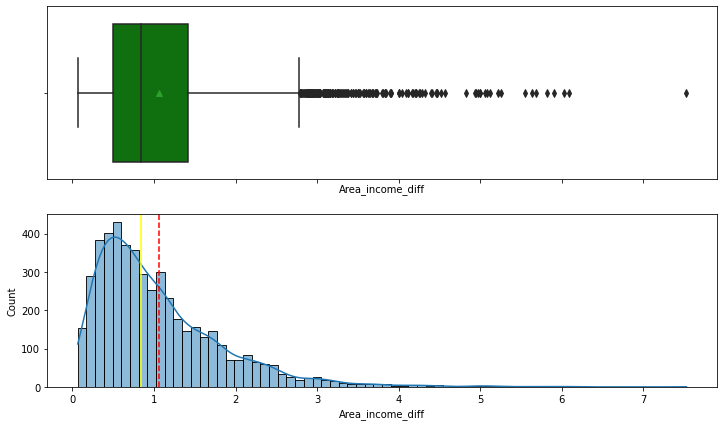

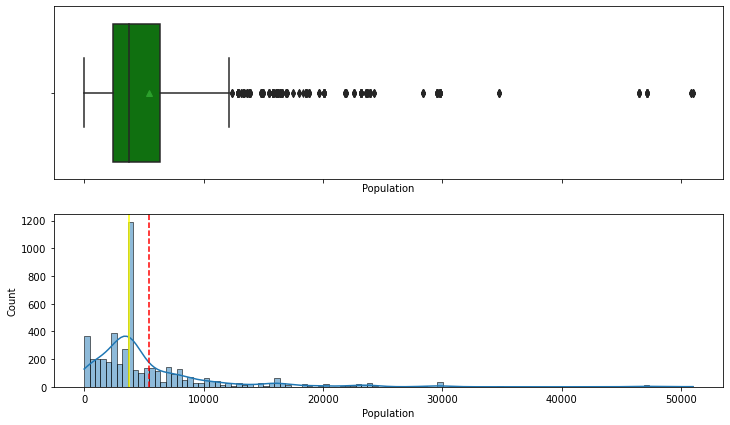

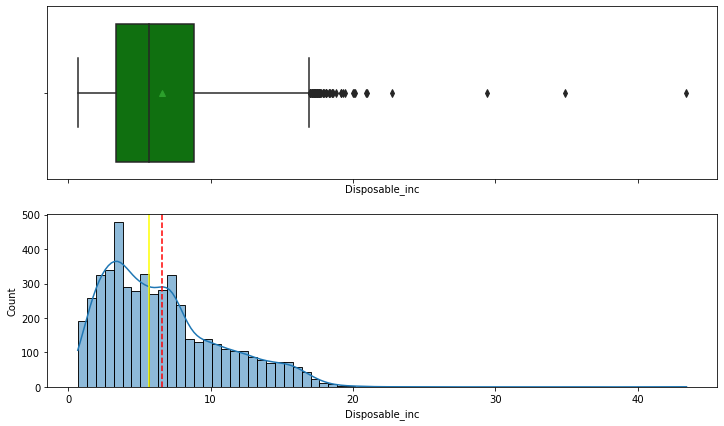

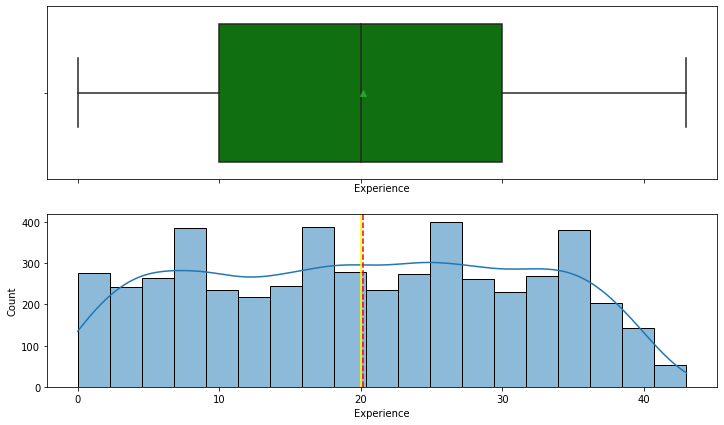

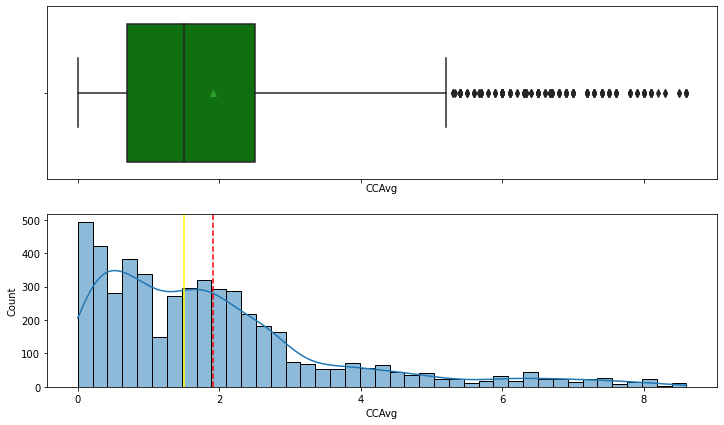

In [144]:
# run the function for all continous variables
cont_var = ['Age', 'Income', 'Area_income_diff', 'Population', 'Disposable_inc', 'Experience', 'CCAvg']

for var in cont_var:
    box_hist(df, var)


The distribution of Experience and Age appear normal but playkurtic, whilst the rest are right skewed.
Outliers outside the IQR times 4 range have already been removed, the rest will be kept.

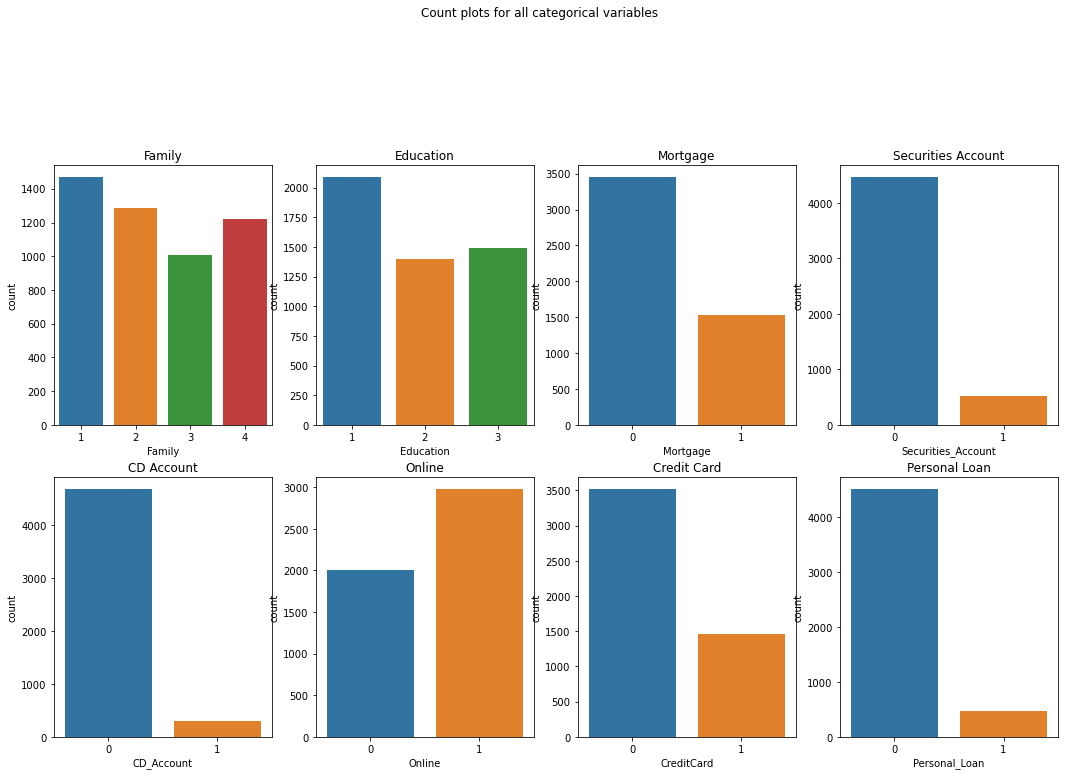

In [152]:
# now I will look at the categorical variables

fig = plt.figure(figsize = (18,22))
fig.suptitle('Count plots for all categorical variables')

plt.subplot(441)
plt.title('Family')
sns.countplot(data = df, x = 'Family');

plt.subplot(442)
plt.title('Education')
sns.countplot(data = df, x = 'Education');

plt.subplot(443)
plt.title('Mortgage')
sns.countplot(data = df, x = 'Mortgage');

plt.subplot(444)
plt.title('Securities Account')
sns.countplot(data = df, x = 'Securities_Account');

plt.subplot(445)
plt.title('CD Account')
sns.countplot(data = df, x = 'CD_Account');

plt.subplot(446)
plt.title('Online')
sns.countplot(data = df, x = 'Online');

plt.subplot(447)
plt.title('Credit Card')
sns.countplot(data = df, x = 'CreditCard');

plt.subplot(448)
plt.title('Personal Loan')
sns.countplot(data = df, x = 'Personal_Loan');

Observations:
1. Most clients come from a household of 1, but the differences are not big
2. Most are undergrads
3. Less than half a mortgage
4. Very few have a securities account
5. Similarly, very few have a certificate of deposit
6. More operate online
7. Less than half have a credit card
8. Finally, only about a TENTH have bought a PERSONAL LOAN.

UNIVARIATE conclusion:

Most clients are low earners, with small families and small disposable income. 

BIVARIATE ANALYSIS

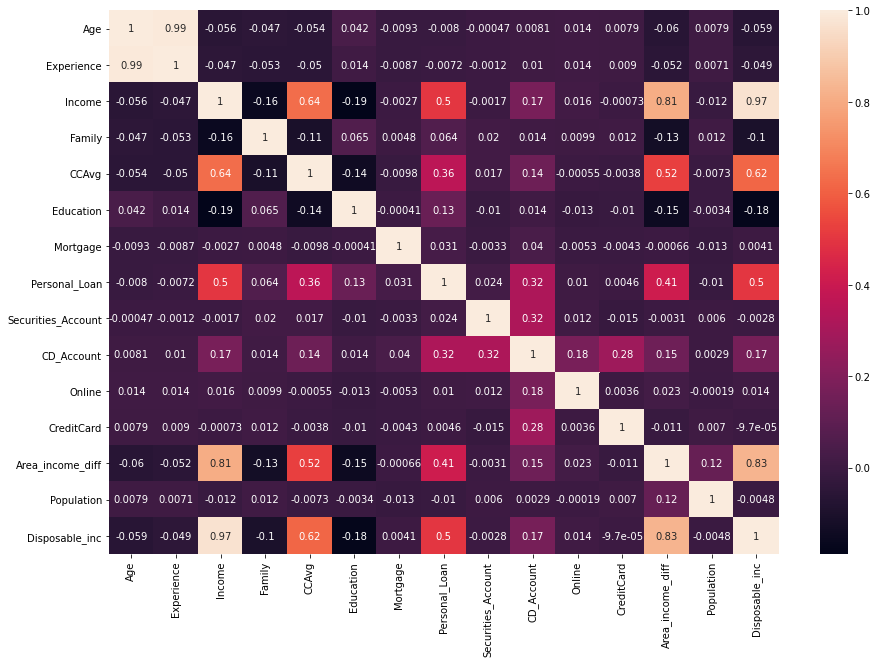

In [154]:
# start with a correlation matrix
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True);

So far, it appears that buying a personal loan is most heavily influenced by INCOME, MEDIAN AREA INCOME DIFFERENCE, and DISPOSABLE INCOME MARGIN. 

These three are relatively highly correlated to one another.

BIVARIATE CONCLUSIONS:

1. Higher Income should play a deciding role in whether a client will buy a personal loan

STEP 6 - NORMALISATION of the distribution

In [78]:
#  I will first separate the target feature from the rest

y = df['Personal_Loan']
X = df.drop('Personal_Loan', axis = 1)

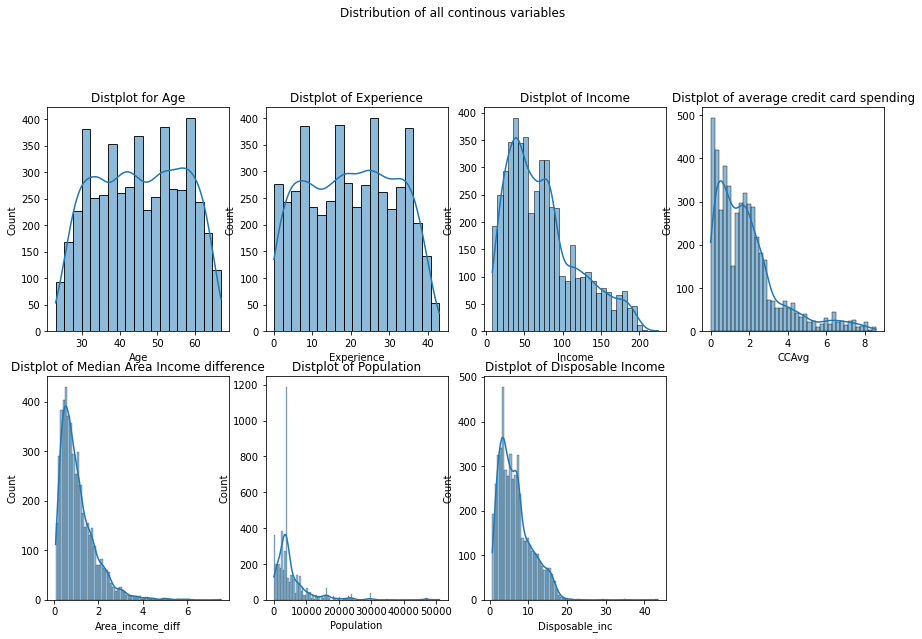

In [79]:
# I will investigate the distribution of the continous variables

fig = plt.figure(figsize = (15,14))
fig.suptitle('Distribution of all continous variables')

plt.subplot(341)
plt.title('Distplot for Age')
sns.histplot(X['Age'], kde = True);

plt.subplot(342)
plt.title('Distplot of Experience')
sns.histplot(X['Experience'], kde = True);

plt.subplot(343)
plt.title('Distplot of Income')
sns.histplot(X['Income'], kde = True);

plt.subplot(344)
plt.title('Distplot of average credit card spending')
sns.histplot(X['CCAvg'], kde = True);

plt.subplot(345)
plt.title('Distplot of Median Area Income difference')
sns.histplot(X['Area_income_diff'], kde = True);

plt.subplot(346)
plt.title('Distplot of Population')
sns.histplot(X['Population'], kde = True);

plt.subplot(347)
plt.title('Distplot of Disposable Income')
sns.histplot(X['Disposable_inc'], kde = True);

Age and Experience seem to be the most normal, but they have a platykurtic distribution. Therefore, I will be normalising all distributions. 

In [80]:
# check for negative or zero values as this determines the type of transformation needed

X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4984.0,45.338082,11.472724,23.000000,35.000000,45.000000,55.000000,67.000000
Experience,4984.0,20.122191,11.450288,0.000000,10.000000,20.000000,30.000000,43.000000
Income,4984.0,73.395867,45.613432,8.000000,39.000000,64.000000,98.000000,224.000000
Family,4984.0,2.397873,1.148428,1.000000,1.000000,2.000000,3.000000,4.000000
CCAvg,4984.0,1.914986,1.702584,0.000000,0.700000,1.500000,2.500000,8.600000
Education,4984.0,1.881220,0.839723,1.000000,1.000000,2.000000,3.000000,3.000000
Mortgage,4984.0,0.307785,0.461623,0.000000,0.000000,0.000000,1.000000,1.000000
Securities_Account,4984.0,0.104535,0.305983,0.000000,0.000000,0.000000,0.000000,1.000000
CD_Account,4984.0,0.060594,0.238608,0.000000,0.000000,0.000000,0.000000,1.000000
Online,4984.0,0.597111,0.490528,0.000000,0.000000,1.000000,1.000000,1.000000


In [81]:
# I will use the logarithmic transformation to normalise the features not containing negatives or zeros

cols = ['Age', 'Income', 'Area_income_diff', 'Population', 'Disposable_inc']
for col in cols:
    X[col + '_log'] = np.log(X[col])
X.drop(cols, axis=1, inplace=True)



In [82]:
# I will use the square root transforation for the rest

cols = ['Experience', 'CCAvg']
for col in cols:
    X[col + '_sqrt'] = np.sqrt(X[col])
X.drop(cols, axis=1, inplace=True)

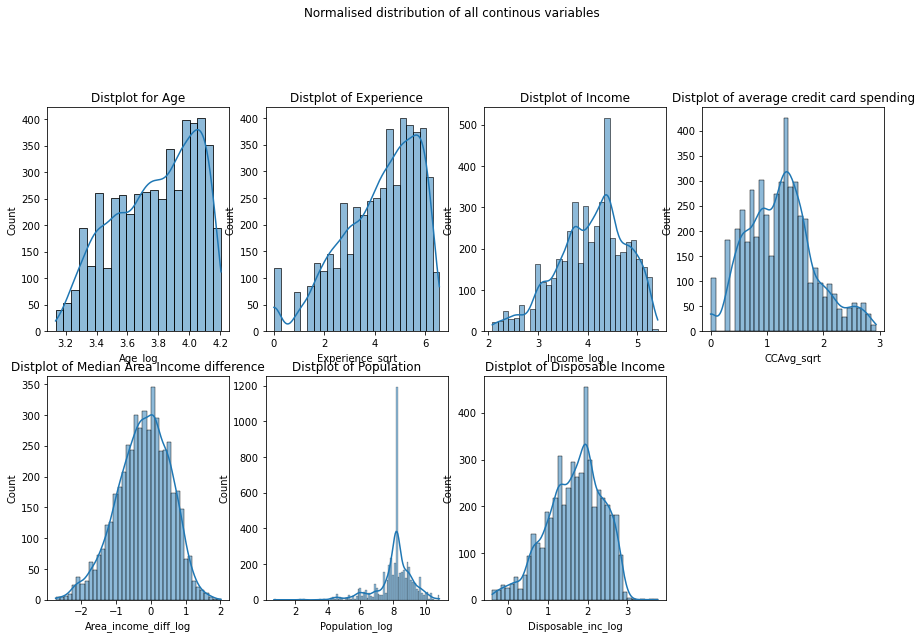

In [83]:
# view the distributions again

fig = plt.figure(figsize = (15,14))
fig.suptitle('Normalised distribution of all continous variables')

plt.subplot(341)
plt.title('Distplot for Age')
sns.histplot(X['Age_log'], kde = True);

plt.subplot(342)
plt.title('Distplot of Experience')
sns.histplot(X['Experience_sqrt'], kde = True);

plt.subplot(343)
plt.title('Distplot of Income')
sns.histplot(X['Income_log'], kde = True);

plt.subplot(344)
plt.title('Distplot of average credit card spending')
sns.histplot(X['CCAvg_sqrt'], kde = True);

plt.subplot(345)
plt.title('Distplot of Median Area Income difference')
sns.histplot(X['Area_income_diff_log'], kde = True);

plt.subplot(346)
plt.title('Distplot of Population')
sns.histplot(X['Population_log'], kde = True);

plt.subplot(347)
plt.title('Distplot of Disposable Income')
sns.histplot(X['Disposable_inc_log'], kde = True);

The distributions appears somewhat more normal.

STEP 7 - RESCALING

In [84]:
# I will use Z tranformation to rescale all numerical features

std_scaler = StandardScaler()

cols = ['Age_log', 'Experience_sqrt', 'Income_log', 'CCAvg_sqrt', 'Area_income_diff_log', 'Population_log', 'Disposable_inc_log']
for col in cols:
    X[col + '_Ztrans'] = std_scaler.fit_transform(X[[col]])
X.drop(cols, axis=1, inplace=True)


STEP 8 - ENCODING CATEGORICAL FEATURES

SPECIAL CASE - ORDINAL CAT. FEATURES: it is better for decision trees not to encode ordinal values, as there is valuable information in there.

In [85]:
# I will create a special X for decision trees where no encoding will be done, since both
# Family and Education are ordinal

X_dt = X.copy()

In [86]:
# for logistical regression catergorical features will be encoded
# I will use one-hot encoding for the categorical variables with more than 2 categories
enc = OneHotEncoder()
df_enc = enc.fit_transform(X[['Family','Education']]).toarray()

# create feature names and then create a dataframe
enc_cols = enc.get_feature_names(['Family','Education'])
enc_frame =  pd.DataFrame(df_enc, columns= enc_cols)
X = X.join(enc_frame)

# drop the unencoded cols
X.drop(['Family','Education'], axis = 1, inplace = True)

The remaining categorical columns will not be encoded since they only have 0s and 1s.

STEP 9 - TRAIN TEST SPLIT

In [87]:
# first observe how many of the two categories of the target value are there

accepted = (y[y == 1].count()/len(y))*100
declined = (y[y == 0].count()/len(y))*100
print(f'Proportion of clients who accepted is {accepted}, whilst of those who declined is {declined}')

Proportion of clients who accepted is 9.470304975922954, whilst of those who declined is 90.52969502407706


Notice the massive imbalance between the groups, this will have to be taken into consideration throughout the model fitting process.

a. For Logistical Regression

In [88]:
# I will train/test split 70% - 30%, but due to several categorical features (including the target variable) having noticeable
# imbalances, will use stratify

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state = 1)

In [89]:
# check proportions of target variable categories

accepted = (y_train[y_train == 1].count()/len(y_train))*100
declined = (y_train[y_train == 0].count()/len(y_train))*100
print(f'Proportion of LOG REG TRAIN clients who accepted is {accepted}, whilst of those who declined is {declined}')

accepted = (y_test[y_test == 1].count()/len(y_test))*100
declined = (y_test[y_test == 0].count()/len(y_test))*100
print(f'Proportion of LOG REG TEST clients who accepted is {accepted}, whilst of those who declined is {declined}')


Proportion of LOG REG TRAIN clients who accepted is 9.461009174311927, whilst of those who declined is 90.53899082568807
Proportion of LOG REG TEST clients who accepted is 9.491978609625669, whilst of those who declined is 90.50802139037432


B. For Decision Trees

In [90]:
# same split will be done for decision trees

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y, stratify = y, test_size=0.3, random_state = 1)

In [91]:
# check proportions of target variable categories

accepted = (y_train_dt[y_train_dt == 1].count()/len(y_train_dt))*100
declined = (y_train_dt[y_train_dt == 0].count()/len(y_train_dt))*100
print(f'Proportion of DEC TREES TRAIN clients who accepted is {accepted}, whilst of those who declined is {declined}')

accepted = (y_test_dt[y_test_dt == 1].count()/len(y_test_dt))*100
declined = (y_test_dt[y_test_dt == 0].count()/len(y_test_dt))*100
print(f'Proportion of DEC TREES TEST clients who accepted is {accepted}, whilst of those who declined is {declined}')


Proportion of DEC TREES TRAIN clients who accepted is 9.461009174311927, whilst of those who declined is 90.53899082568807
Proportion of DEC TREES TEST clients who accepted is 9.491978609625669, whilst of those who declined is 90.50802139037432


Proportions appear to be in order. Before fitting the models, I will create 2 functions for each ML model to help with accuracy comparrison and the creation of confusion matrices.

In [105]:
# I need a function which would automatically calculate several accuracy metrics for my logistical regression models

def log_reg_performance(model, predictors, target, threshold):
    
    # after fitting the model, predict the probabilities for each instance
    probs = model.predict_proba(predictors)[:, 1]
    # compare to threshold
    probs_thresh = probs > threshold
    # create y_pred by rounding 
    y_pred = np.round(probs_thresh)
    
    # calculate accuracy metrics
    acc = accuracy_score(target, y_pred)
    recall = recall_score(target, y_pred)
    precision = precision_score(target, y_pred)
    f1 = f1_score(target, y_pred)
    cohen = cohen_kappa_score(target, y_pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1, "Cohen kappa": cohen}, index=[0],)

    return df_perf


In [106]:
# same for decision trees

def dec_tree_performance(model, predictors, target):

    # calculate the y_preds
    y_pred = model.predict(predictors)
    
    # calculate accuracy metrics
    acc = accuracy_score(target, y_pred)
    recall = recall_score(target, y_pred)
    precision = precision_score(target, y_pred)
    f1 = f1_score(target, y_pred)
    cohen = cohen_kappa_score(target, y_pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1, "Cohen kappa": cohen}, index=[0],)

    return df_perf
 

In [94]:
# next I will create a function to plot the confusion_matrix of logistical regressions

def log_reg_confmat(model, predictors, target, threshold):

    # after fitting the model, predict the probabilities for each instance
    probs = model.predict_proba(predictors)[:, 1]
    # compare to threshold
    probs_thresh = probs > threshold
    # create y_pred by rounding 
    y_pred = np.round(probs_thresh)

    # create confusion matrix
    cm = confusion_matrix(target, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot = True, fmt = "")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [95]:
# same for decision trees

def dec_tree_confmat(model, predictors, target):

    # calculate the y_preds
    y_pred = model.predict(predictors)

    # create confusion matrix
    cm = confusion_matrix(target, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot = True, fmt = "")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

STEP 10 - LOGISTIC REGRESSION MODEL

In [107]:
# fit the model, I use liblinear because I have only 2 target categories and the sample is small

logr = LogisticRegression(solver = 'liblinear')
lg = logr.fit(X_train, y_train)

,Accuracy,Recall,Precision,F1,Cohen kappa
0,0.968463,0.727273,0.923077,0.813559,0.796599


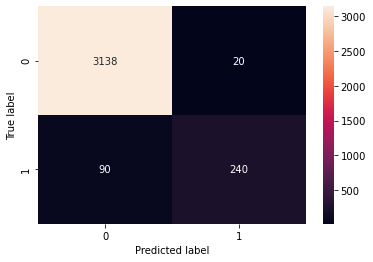

In [108]:
# check confusion matrix and performance metrics for TRAIN data

log_reg_confmat(lg, X_train, y_train, 0.5)
log_reg_performance(lg, X_train, y_train, 0.5)

,Accuracy,Recall,Precision,F1,Cohen kappa
0,0.96123,0.683099,0.881818,0.769841,0.749046


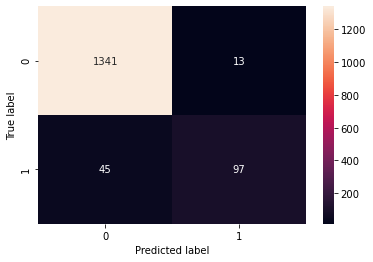

In [109]:
# check confusion matrix and performance metrics for TEST data

log_reg_confmat(lg, X_test, y_test, 0.5)
log_reg_performance(lg, X_test, y_test, 0.5)

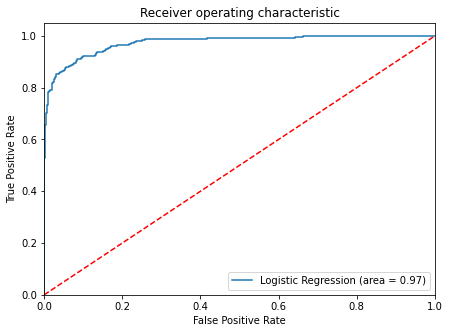

In [110]:
# chech the ROC and AUC for TRAIN set

# first calculate the ROC AUC score
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
# obtain the false and true positive rates, and the thersholds
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

# create the figure
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Improving the model.

a. Optimal threshold using the AUC-ROC curve

In [111]:
# find the optimal cutoff where the true positive rate is highest and the negative pr is lowest

# calculate fpr, tpr and the thresholds
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

# obtain the id of the biggest difference between tpr and fpr
optimal_id = np.argmax(tpr - fpr)

# obtain the actual threshold using the above id
optimal_thresh = thresholds[optimal_id]
print(optimal_thresh)

0.10470366526383913


,Accuracy,Recall,Precision,F1,Cohen kappa
0,0.902523,0.921212,0.491909,0.64135,0.590885


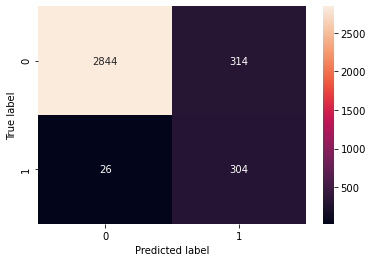

In [112]:
# check confusion matrix and performance metrics for TRAIN data

log_reg_confmat(lg, X_train, y_train, optimal_thresh)
log_reg_performance(lg, X_train, y_train, optimal_thresh)

,Accuracy,Recall,Precision,F1,Cohen kappa
0,0.918449,0.93662,0.54065,0.685567,0.642543


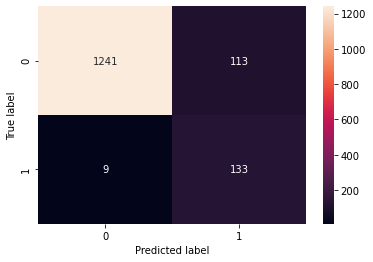

In [113]:
# check confusion matrix and performance metrics for TEST data

log_reg_confmat(lg, X_test, y_test, optimal_thresh)
log_reg_performance(lg, X_test, y_test, optimal_thresh)

b. Optimal threshold using the precision recall curve

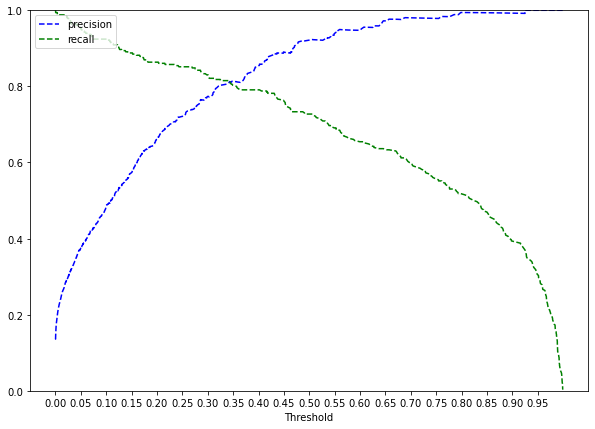

In [114]:
# first calculate the probabilities
probs = lg.predict_proba(X_train)[:, 1]
# calculate the precision, recall and thresholds 
precisions, recalls, thresholds = precision_recall_curve(y_train, probs,)

# create plot
plt.figure(figsize=(10, 7))
plt.plot(thresholds, precisions[:-1], "b--", label="precision")
plt.plot(thresholds, recalls[:-1], "g--", label="recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.xticks(np.arange(0, 1, 0.05))
plt.show()



A threshold of 0.34 appears to be optimal for equal precision and recall. However, since recall is more important in this case, I will choose 0.3 as the best threshold.

,Accuracy,Recall,Precision,F1,Cohen kappa
0,0.961009,0.830303,0.774011,0.80117,0.779584


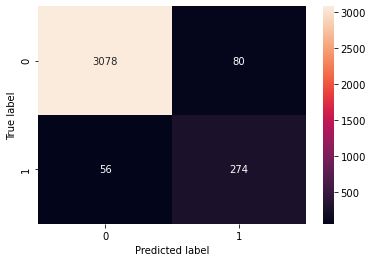

In [115]:
# check confusion matrix and performance metrics for TRAIN data

log_reg_confmat(lg, X_train, y_train, 0.3)
log_reg_performance(lg, X_train, y_train, 0.3)

,Accuracy,Recall,Precision,F1,Cohen kappa
0,0.959225,0.816901,0.768212,0.791809,0.769232


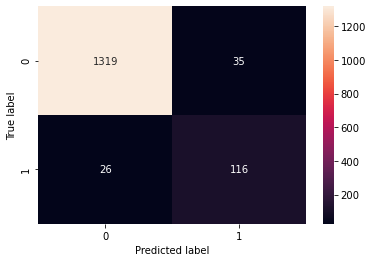

In [116]:
# check confusion matrix and performance metrics for TEST data

log_reg_confmat(lg, X_test, y_test, 0.3)
log_reg_performance(lg, X_test, y_test, 0.3)

In [117]:
# I will put all performance measures in one data frame for ease of comparison

logreg_perf_summary = pd.concat([
    log_reg_performance(lg, X_train, y_train, 0.5).T,
    log_reg_performance(lg, X_test, y_test, 0.5).T,
    log_reg_performance(lg, X_train, y_train, optimal_thresh).T,
    log_reg_performance(lg, X_test, y_test, optimal_thresh).T,
    log_reg_performance(lg, X_train, y_train, 0.3).T,
    log_reg_performance(lg, X_test, y_test, 0.3).T,
], axis = 1) 

logreg_perf_summary.columns = [
    "Logistic Regression-0.5 TRAIN",
    "Logistic Regression-0.5 TEST",
    "Logistic Regression-0.167 TRAIN",
    "Logistic Regression-0.167 TEST",
    "Logistic Regression-0.3 TRAIN",
    "Logistic Regression-0.3 TEST"
]


logreg_perf_summary

,Logistic Regression-0.5 TRAIN,Logistic Regression-0.5 TEST,Logistic Regression-0.167 TRAIN,Logistic Regression-0.167 TEST,Logistic Regression-0.3 TRAIN,Logistic Regression-0.3 TEST
Accuracy,0.968463,0.961230,0.902523,0.918449,0.961009,0.959225
Recall,0.727273,0.683099,0.921212,0.936620,0.830303,0.816901
Precision,0.923077,0.881818,0.491909,0.540650,0.774011,0.768212
F1,0.813559,0.769841,0.641350,0.685567,0.801170,0.791809
Cohen kappa,0.796599,0.749046,0.590885,0.642543,0.779584,0.769232


CONCLUSION:

I have run three models corresponding to three different thresholds and measured accuracy using 5 methods.
The best model OVERALL for the TEST set, based on the F1 and Cohen kappa scores (both composite scores), is the one with a threshold of 0.3. 

This model also obtained a RECALL score of 0.816 on the TEST set, meaning that it correctly identified 81.6% of the total number of clients who would accept a personal loan.



After deciding on the best model, I will investigate the coefficients.

In [118]:
# transform from log odds into odds and percentage odds for ease of interpretation

odds = np.exp(lg.coef_[0])
odds_percentage = (np.exp(lg.coef_[0]) - 1) * 100

pd.DataFrame({"Odds": odds, "Change_odd%": odds_percentage}, index=X_train.columns).T

,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Age_log_Ztrans,Experience_sqrt_Ztrans,Income_log_Ztrans,CCAvg_sqrt_Ztrans,Area_income_diff_log_Ztrans,Population_log_Ztrans,Disposable_inc_log_Ztrans,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
Odds,1.404932,0.650701,21.407515,0.544286,0.532911,0.652485,1.632790,29.419488,1.522542,0.985452,0.987743,3.792698,0.195925,0.147389,1.177313,0.737816,0.026135,0.997827,0.961863
Change_odd%,40.493195,-34.929888,2040.751512,-45.571400,-46.708886,-34.751450,63.279011,2841.948773,52.254165,-1.454830,-1.225747,279.269753,-80.407547,-85.261142,17.731303,-26.218401,-97.386491,-0.217274,-3.813678


INTERPRETATION:

1. Major positive impact in descending order: Income, CD_Account and Disposable Income margin.
2. Major negative impact in descending order: Education level 1, Familiy of 2 and 1, and having a Credit card.

STEP 11 - DECISION TREES MODEL

In [119]:
# fit the model 

dtree = DecisionTreeClassifier(criterion= 'gini', random_state=1)
dtree.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(random_state=1)

,Accuracy,Recall,Precision,F1,Cohen kappa
0,1.0,1.0,1.0,1.0,1.0


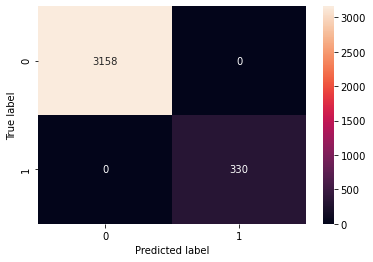

In [120]:
# check confusion matrix and performance metrics for TRAIN data

dec_tree_confmat(dtree, X_train_dt, y_train_dt)
dec_tree_performance(dtree, X_train_dt, y_train_dt)

As expected, the train accuracy is perfect.

,Accuracy,Recall,Precision,F1,Cohen kappa
0,0.98262,0.901408,0.914286,0.907801,0.898208


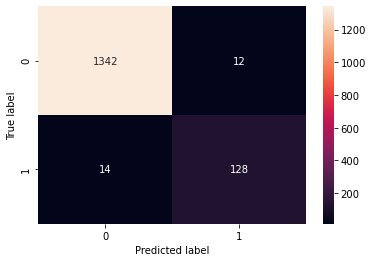

In [121]:
# check confusion matrix and performance metrics for TEST data

dec_tree_confmat(dtree, X_test_dt, y_test_dt)
dec_tree_performance(dtree, X_test_dt, y_test_dt)

Accuracy on test is also very good, but the model is too complicated at this point. It must be simplified.

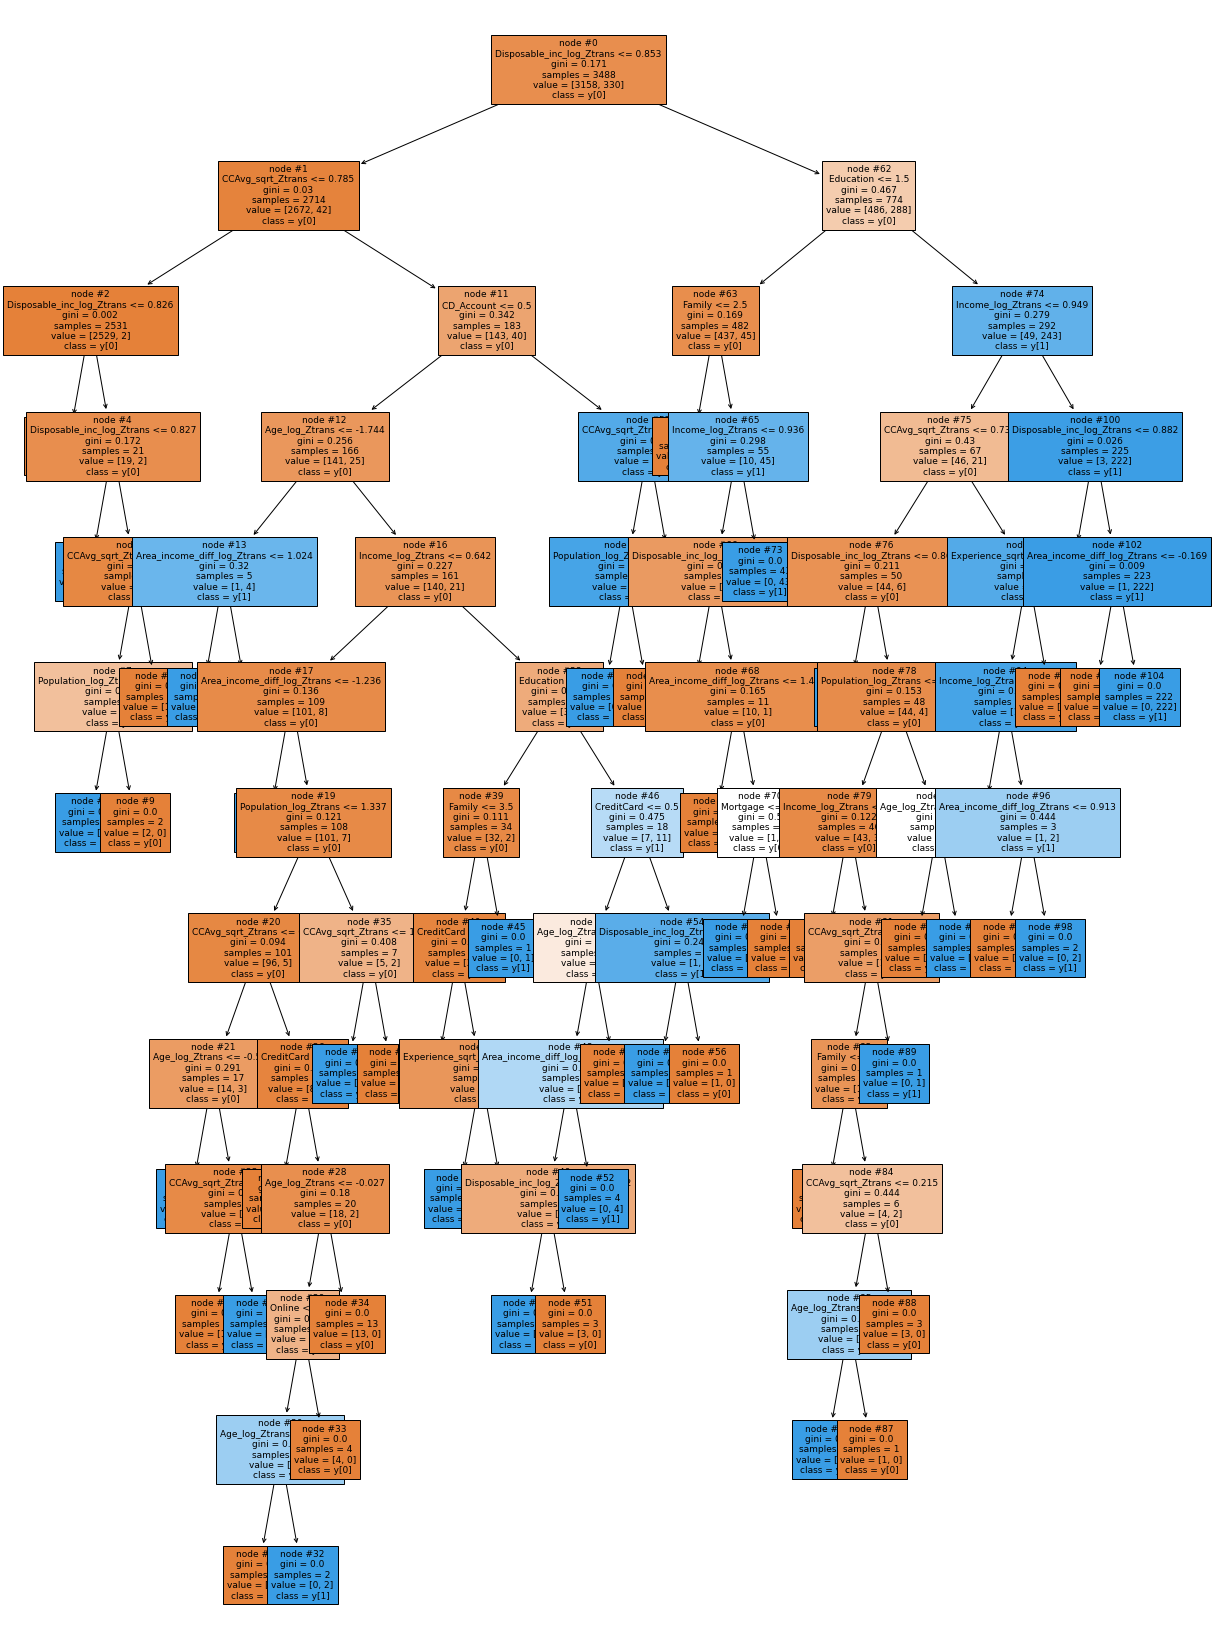

In [122]:
# visualise the complexity of this model

plt.figure(figsize=(20,30))
tree.plot_tree(dtree,feature_names= list(X_dt.columns),filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

Improving the model.

a. PRE-PRUNING

In [123]:
# find the best parameters using GridSearchCV

# create classifier
model = DecisionTreeClassifier(random_state=1)

# set parameters
parameters = {'criterion' : ['gini', 'entropy'],
            'max_depth': np.arange(1,12), 
            'min_impurity_decrease': [0.001,0.01,0.1]
             }

# set type of score to judge accuracy on, in this case - RECALL
acc = make_scorer(recall_score)

# run the grid search, with 5 cross validation sets
grid_obj = GridSearchCV(model, parameters, scoring=acc, cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

# use best parameters to create a new model
model_pre = grid_obj.best_estimator_

# Fit the best algorithm to the data 
model_pre.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=4,
                       min_impurity_decrease=0.001, random_state=1)

,Accuracy,Recall,Precision,F1,Cohen kappa
0,0.988819,0.909091,0.970874,0.938967,0.93282


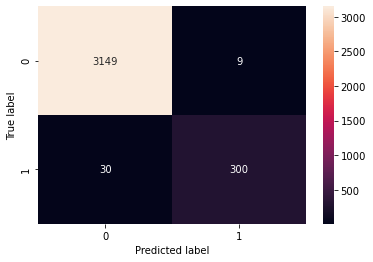

In [124]:
# check confusion matrix and performance metrics for TRAIN data

dec_tree_confmat(model_pre, X_train_dt, y_train_dt)
dec_tree_performance(model_pre, X_train_dt, y_train_dt)

,Accuracy,Recall,Precision,F1,Cohen kappa
0,0.981283,0.866197,0.931818,0.89781,0.887524


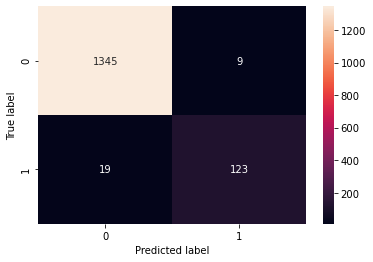

In [125]:
# check confusion matrix and performance metrics for TEST data

dec_tree_confmat(model_pre, X_test_dt, y_test_dt)
dec_tree_performance(model_pre, X_test_dt, y_test_dt)

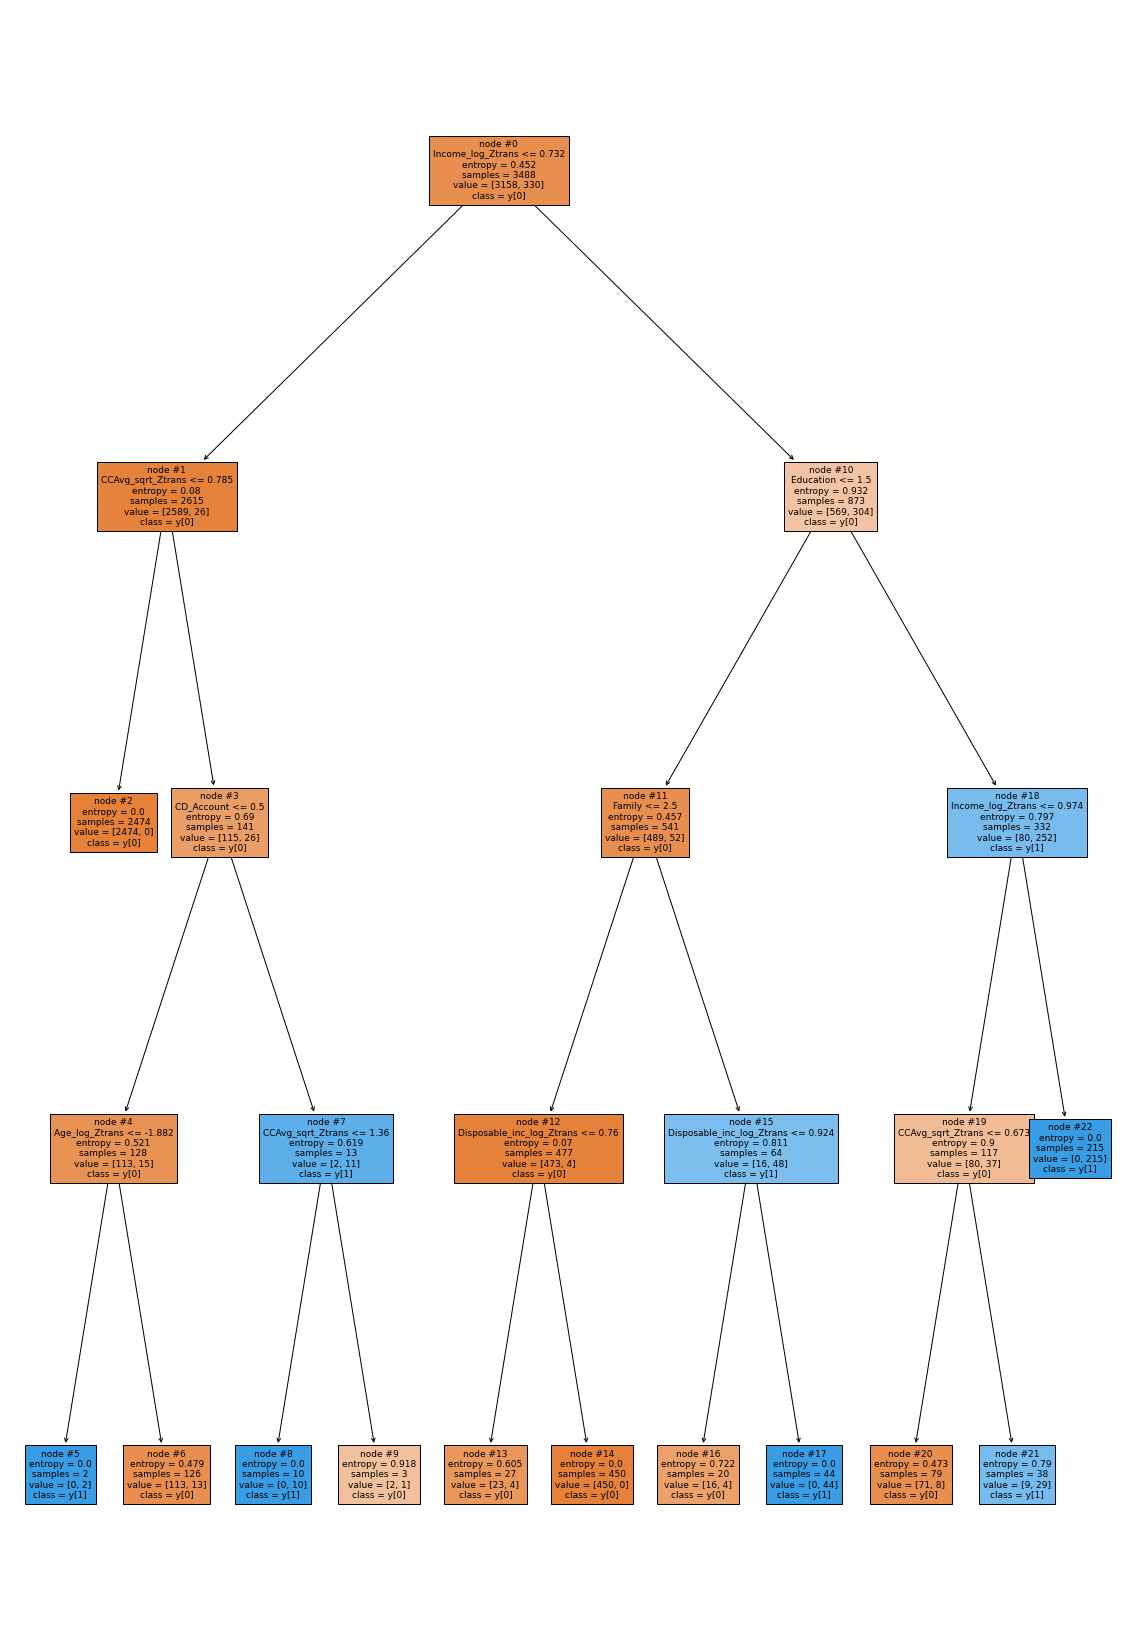

In [126]:
# visualise the complexity of this model

plt.figure(figsize=(20,30))
tree.plot_tree(model_pre,feature_names= list(X_dt.columns),filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

For an almost negligible drop in performance, the model has been significantly simplified.

b. POST-PRUNING 

I will use Cost-Complexity Pruning to reduce complexity after the tree is built.

In [127]:
# first create a model
model_post = DecisionTreeClassifier(random_state=1)

# define the pruning path
path = model_post.cost_complexity_pruning_path(X_train_dt, y_train_dt)

# extract the effective alphas and the node impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities


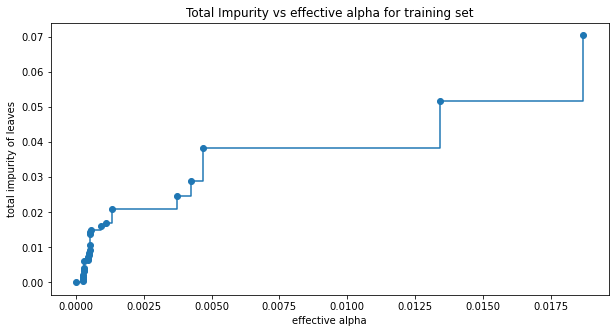

In [128]:
# visualise the relationship between the alphas and the impurities

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Unsurprisingly, as the cost-complexity parameter alpha increases, more nodes are pruned, which results in increased impurity in the remaining ones.

In [129]:
# fit a model for each alpha
models_ccp = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=1, ccp_alpha = ccp_alpha)
    model.fit(X_train_dt, y_train_dt)
    models_ccp.append(model)

# remove the final alpha and its resulting model, as it represents only the root node
ccp_alphas = ccp_alphas[:-1]
models_ccp = models_ccp[:-1]


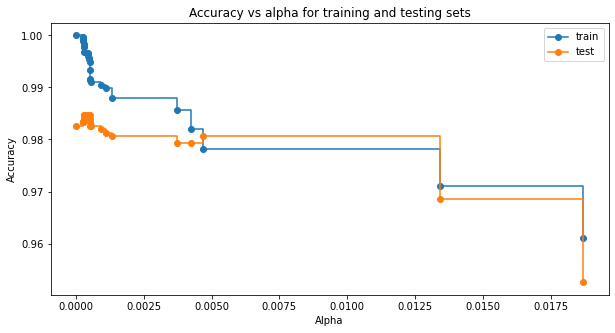

In [130]:
# visualise how accuracy varies based on the alpha

#first calculate train and test scores for each model
train_scores = [model.score(X_train_dt, y_train_dt) for model in models_ccp]
test_scores = [model.score(X_test_dt, y_test_dt) for model in models_ccp]

# create the figure 
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

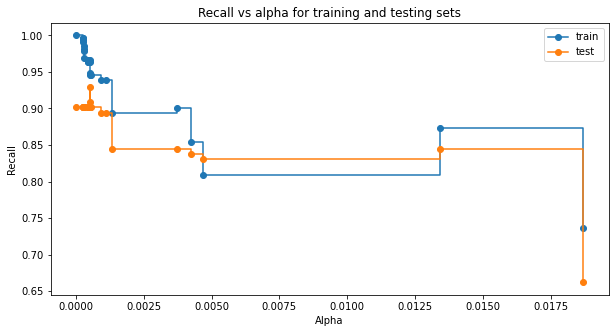

In [131]:
# visualise recall performance as well, since this is the more important metric

#first calculate train and test scores for each model
recall_train=[]
for model in models_ccp:
    pred_train=model.predict(X_train_dt)
    values_train=recall_score(y_train_dt,pred_train)
    recall_train.append(values_train)
recall_test=[]
for model in models_ccp:
    pred_test=model.predict(X_test_dt)
    values_test=recall_score(y_test_dt,pred_test)
    recall_test.append(values_test)

# create the figure 
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("Alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [132]:
# create the model with the highest test recall
index_best = np.argmax(recall_test)
model_post_best = models_ccp[index_best]
print (model_post_best)


DecisionTreeClassifier(ccp_alpha=0.0005104424542497937, random_state=1)


,Accuracy,Recall,Precision,F1,Cohen kappa
0,0.993406,0.966667,0.963746,0.965204,0.961562


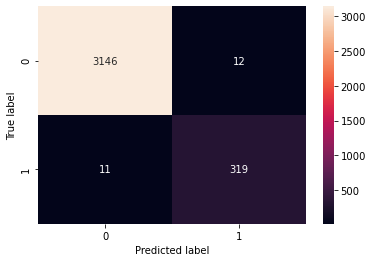

In [133]:
# check confusion matrix and performance metrics for TRAIN data

dec_tree_confmat(model_post_best, X_train_dt, y_train_dt)
dec_tree_performance(model_post_best, X_train_dt, y_train_dt)

,Accuracy,Recall,Precision,F1,Cohen kappa
0,0.984626,0.929577,0.910345,0.919861,0.911359


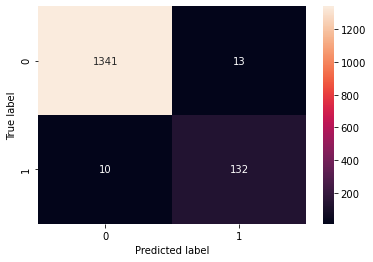

In [134]:
# check confusion matrix and performance metrics for TEST data

dec_tree_confmat(model_post_best, X_test_dt, y_test_dt)
dec_tree_performance(model_post_best, X_test_dt, y_test_dt)

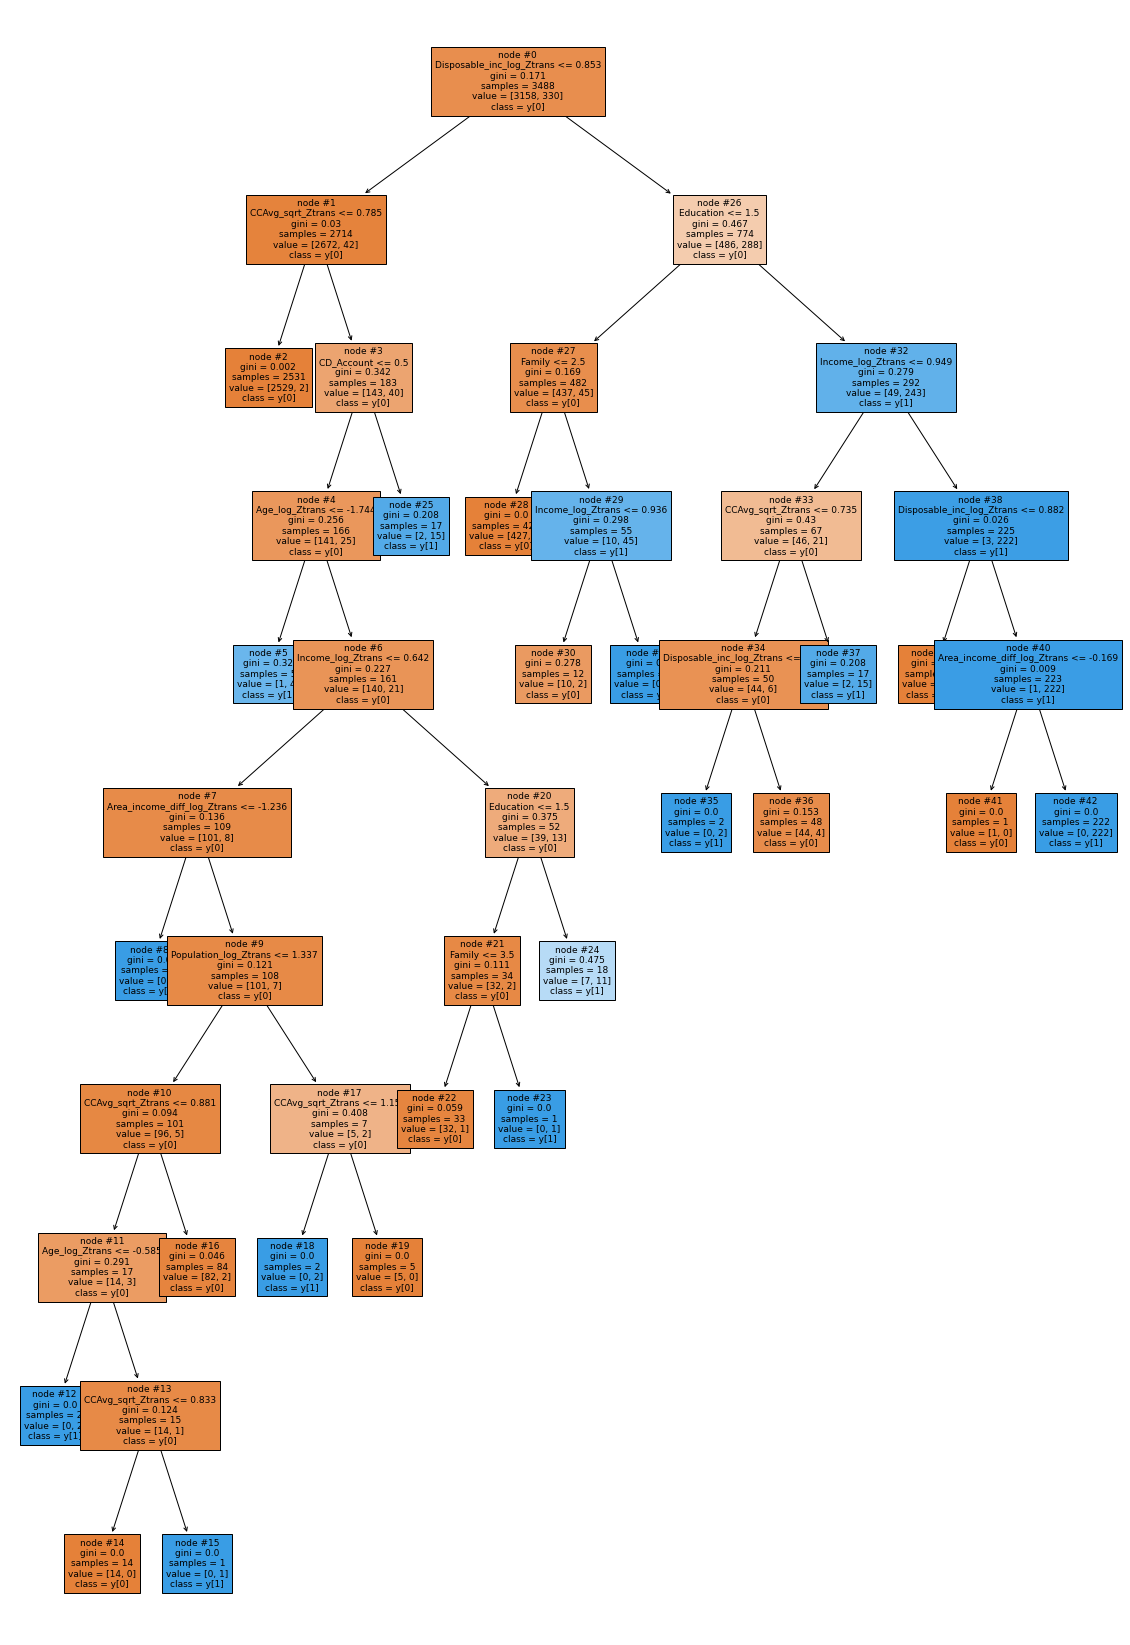

In [135]:
# visualise the complexity of this model

plt.figure(figsize=(20,30))
tree.plot_tree(model_post_best,feature_names= list(X_dt.columns),filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [136]:
# I will put all performance measures in one data frame for ease of comparison

dtree_perf_summary = pd.concat([

    dec_tree_performance(dtree, X_train_dt, y_train_dt).T,
    dec_tree_performance(dtree, X_test_dt, y_test_dt).T,
    dec_tree_performance(model_pre, X_train_dt, y_train_dt).T,
    dec_tree_performance(model_pre, X_test_dt, y_test_dt).T,
    dec_tree_performance(model_post_best, X_train_dt, y_train_dt).T,
    dec_tree_performance(model_post_best, X_test_dt, y_test_dt).T
], axis = 1) 

dtree_perf_summary.columns = [
    "Decision Tree - BASIC TRAIN",
    "Decision Tree - BASIC TEST",
    "Decision Tree - PRE TRAIN",
    "Decision Tree - PRE TEST",
    "Decision Tree - POST TRAIN",
    "Decision Tree - POST TEST"
]


dtree_perf_summary

,Decision Tree - BASIC TRAIN,Decision Tree - BASIC TEST,Decision Tree - PRE TRAIN,Decision Tree - PRE TEST,Decision Tree - POST TRAIN,Decision Tree - POST TEST
Accuracy,1.0,0.982620,0.988819,0.981283,0.993406,0.984626
Recall,1.0,0.901408,0.909091,0.866197,0.966667,0.929577
Precision,1.0,0.914286,0.970874,0.931818,0.963746,0.910345
F1,1.0,0.907801,0.938967,0.897810,0.965204,0.919861
Cohen kappa,1.0,0.898208,0.932820,0.887524,0.961562,0.911359


CONCLUSION:

Just like for the logistic regression, here I have also built three models and used four measures of accuracy. The OVERALL best model, based on the F1 and Cohen Kappa scores, was UNSURPRISINGLY the un-pruned model. However, since this one is too complex, the second best model is the POST pruned one.

Here I obtained a RECALL score of 0.93, meaning that it correctly identified 93% of potential loan takers.

After deciding on the best model, I will investigate the coefficients.

In [138]:
print (pd.DataFrame(model_post_best.feature_importances_, columns = ["Imp"], index = X_dt.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Education                    0.367433
Disposable_inc_log_Ztrans    0.286403
Family                       0.119784
Income_log_Ztrans            0.110792
CCAvg_sqrt_Ztrans            0.064874
CD_Account                   0.029499
Age_log_Ztrans               0.013259
Area_income_diff_log_Ztrans  0.006652
Population_log_Ztrans        0.001305
Mortgage                     0.000000
Securities_Account           0.000000
Online                       0.000000
CreditCard                   0.000000
Experience_sqrt_Ztrans       0.000000


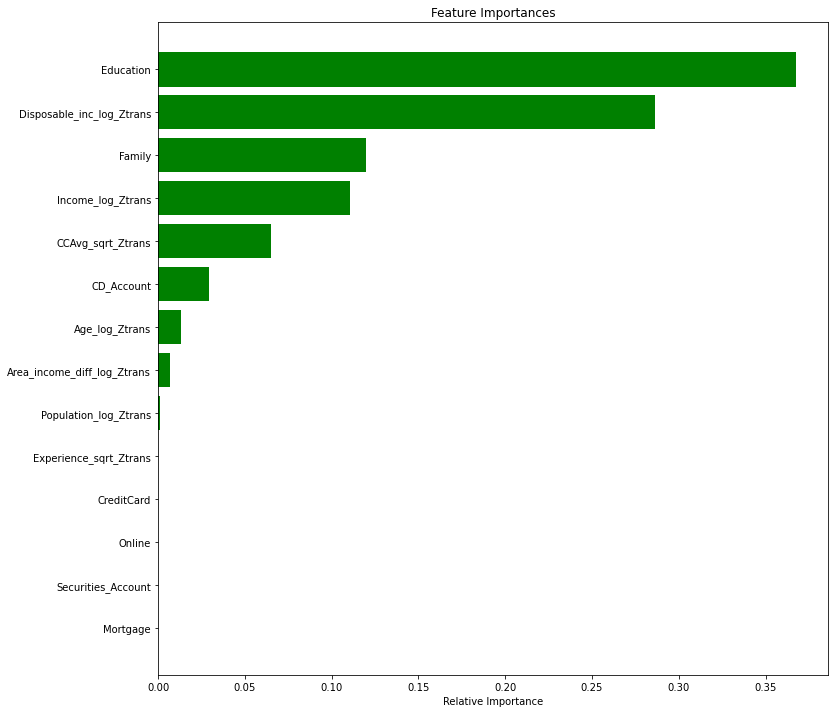

In [139]:
# extract the feature importances from the best model
importances = model_post_best.feature_importances_

# sorts the importances
indices = np.argsort(importances)

# create figure
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [list(X_dt.columns)[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

INTERPRETATION:

The two most important features were EDUCATION and DISPOSABLE INCOME margin. Next in line, on equal grounds, was FAMILY size and INCOME. 

These results are very similar to those of the logistic regression.


FINAL CONCLUSIONS:
1. Logistic regression and decision tree models were built which where able to predict loan takers with high precision in the test set (81% and 93%, respectively).
2. Most important features were: education, family, disposable income margin, income, having a CD account and a Credit card account.

RECOMMENDATIONS:

1. Advertise to better educated clients, especially those with larger families.
2. Target those with a high income and high disposable income margin.
3. Also, focus on those with a CD account.

